In [1]:
#Author: Walter Nam
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

In [2]:
class Data:
    def __init__(self, bias, x1, x2, y):
        self.bias = bias
        self.x1 = x1
        self.x2 = x2
        self.y = y
        
    def polynomial_phi(self, bias, x1, x2):
        phi = np.array([
            bias, 
            x1, 
            x2, 
            x1*x2,
            x1**2, 
            x2**2]).transpose()
        return phi
    
    def linear_plane_phi(self, bias, x1, x2):
        phi = np.array([bias, x1, x2]).transpose()
        return phi
    
    # w = (phi.T * phi)^ -1 * phi.T * y
    #polynomial phi is a singular matrix, which is not invertable. Not column independent, so we use right pseudo-inverse
    def left_inverse(self, phi, y):
        cross_inverse = np.linalg.inv(np.matmul(phi.transpose(), phi))
        weights = np.matmul(np.matmul(cross_inverse, phi.transpose()), y)
        return weights
    
    # w = phi.T*(phi * phi.T)^-1* y
    def right_inverse(self, phi, y):
        cross_inverse = np.linalg.inv(np.matmul(phi, phi.transpose()))
        weights = np.matmul(phi.transpose(), np.matmul(cross_inverse, y))
        return weights
    
    def predicted_y(self, bias, x1, x2, weights, create_phi):
        feature_vector = create_phi(bias, x1, x2)
        predicted = np.dot(feature_vector, weights)
        return predicted[0]
    
    def batch_gd(self, pmax, eta, w0, phi, y, x1, x2, create_phi, MSE_array):
        D = (1/len(y))*(np.sum(y**2))
        P = (1/len(y))*(np.matmul(y, phi))
        R = (1/len(y))*(np.matmul(phi.transpose(), phi))
        for i in range(pmax):
            w0 += eta*(-1*(np.matmul(w0, R)-P))
            MSE = 0.5*D - np.matmul(P, w0.transpose()) + 0.5*(np.matmul(np.matmul(w0, R), w0.transpose()))
            MSE_array.append(MSE[0,0])
        bias = np.array([1,1,1,1])
        feature_vector = create_phi(bias, x1, x2)
        bgd_predicted = np.dot(np.array([feature_vector]), w0.transpose())
        return bgd_predicted[0]
    
    def stochastic_gd(self, pmax, eta, w0, phi, y, x1, x2, create_phi, MSE_array):
        D = (1/len(y))*(np.sum(y**2))
        P = (1/len(y))*(np.matmul(y, phi))
        R = (1/len(y))*(np.matmul(phi.transpose(), phi))
        k = 0
        for i in range(pmax):
            if k == len(phi):
                k = 0
            X_k = phi[k]
            d_k = y[k]
            s_k = np.matmul(X_k, w0.transpose())
            e = (d_k - s_k)
            w0 += eta*(e*X_k)
            MSE = 0.5*D - np.matmul(P, w0.transpose()) + 0.5*(np.matmul(np.matmul(w0, R), w0.transpose()))
            MSE_array.append(MSE[0,0])
            k += 1
        bias = np.array([1,1,1,1])
        feature_vector = create_phi(bias, x1, x2)
        sgd_predicted = np.dot(np.array([feature_vector]), w0.transpose())
        return sgd_predicted[0]
            
        
    def graph_data(self,iterations, MSE_array, gd_name):
        x_range = range(1,iterations + 1)
        plt.plot(x_range, MSE_array)
        plt.xlabel('# iterations')
        plt.ylabel('MSE')
        plt.title(''f'{gd_name} MSE vs Pmax = 'f'{iterations}')

[[1 0 0 0 0 0]
 [1 1 0 0 1 0]
 [1 0 1 0 0 1]
 [1 1 1 1 1 1]]
pseudo-inverse y-value:  2.0
BGD y-value:  1.9947723494645895
SGD y-value:  1.9999441839388932


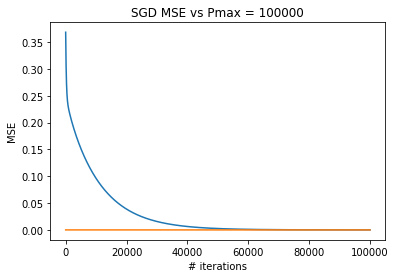

In [3]:
bias = np.array([1,1,1,1])
x1 = np.array([0,1,0,1])
x2 = np.array([0,0,1,1])
y = np.array([1,0,0,2])
data_set = Data(bias,x1, x2, y)
phi = data_set.polynomial_phi(bias, x1, x2)
print(phi)

weights = data_set.right_inverse(phi, y)
x1 = 1
x2 = 1
pred_y = data_set.predicted_y(bias, x1, x2, weights, data_set.polynomial_phi)
print("pseudo-inverse y-value: ", pred_y)

pmax = 100000
eta = 0.001
w0 = np.array([
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
])
loss_function = []
bgd_y = data_set.batch_gd(pmax, eta, w0, phi, y, x1, x2, data_set.polynomial_phi, loss_function)
print("BGD y-value: ", bgd_y[0][0])
data_set.graph_data(pmax, loss_function, "BGD")

SGD_loss_function = []
sgd_y = data_set.stochastic_gd(pmax, eta, w0, phi, y, x1, x2, data_set.polynomial_phi, SGD_loss_function)
print("SGD y-value: ", sgd_y[0][0])
data_set.graph_data(pmax, SGD_loss_function, "SGD")